**Credits Jianhong**

ST810 Big Data Group Presentation: Multiple Testing Demonstrations

1. Comparison of Adjusted p-values

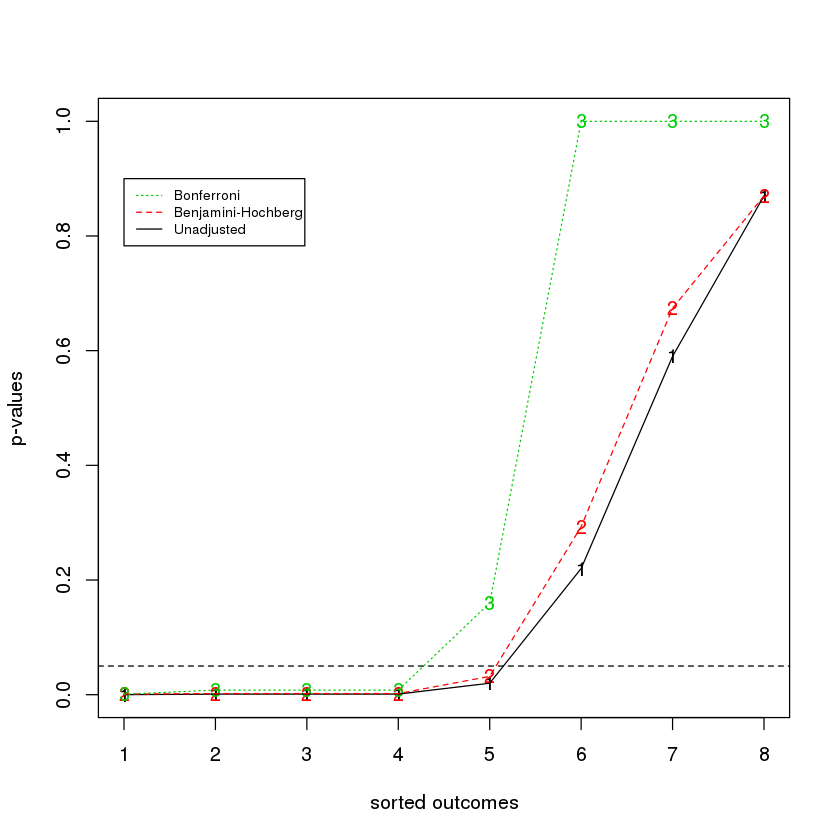

In [2]:
pvals = c(.0001,.001, .001, .001, .02, .22, .59, .87)   #Raw p-values
BONF = p.adjust(pvals, "bonferroni")                    #Bonferroni adjustment
BH = p.adjust(pvals, "BH")                              #BH adjustment
res = cbind(pvals, BH=round(BH, 3), BONF=round(BONF, 3))
matplot(res, ylab="p-values", xlab="sorted outcomes")
abline(h=0.05, lty=2)
matlines(res)
legend(1, .9, legend=c("Bonferroni", "Benjamini-Hochberg", "Unadjusted"), 
  col=c(3, 2, 1), lty=c(3, 2, 1), cex=0.7)

The 5th most significant outcome remains statistically significant at the alpha=0.05 level for all but the Bonferroni procedure.

2.Demonstration of Benjamin-Hochberg (FDR) procedure

In [3]:
alpha = 0.05                             # Chosen False Discovery Rate
pvals = c(0.001, 0.008, 0.016, 0.019, 0.039, 0.041, 0.275, 0.384, 0.569, 0.762 ) 
criteria = alpha*c(1:10)/10              # critical values
rbind(pvals,criteria)

pvals,0.001,0.008,0.016,0.019,0.039,0.041,0.275,0.384,0.569,0.762
criteria,0.005,0.010,0.015,0.020,0.025,0.030,0.035,0.040,0.045,0.050


#The tests 1, 2, 3 and 4 are declared as significant

3.Demonstration of how FWER control works

Without any adjustment, the probablity of rejecting at least one true null

In [4]:
set.seed(852)
nsims = 1000     # number of simulation
ntests = 10      # number of tests
nfalse = 5       # number of false null
howfalse = .001  # make sure all false null have very small p-values so that all of them can be rejected
raw_p = matrix(c(runif(nfalse * nsims) * howfalse, runif((ntests-nfalse) * nsims)), nrow=nsims) 
reject = ifelse(raw_p<.05, 1,0)
sum.rej = apply(reject, 1, sum)
prop.table(table(sum.rej))


sum.rej
    5     6     7     8 
0.761 0.210 0.024 0.005 

10 tests, 5 are true null and 5 are false null. Among 1000 simulation, all the 5 true false null are rejected 76.1% of the time. Reject 1 or more true null 23.9% (0.21+0.024+0.005) of the time.


Bonferroni adjustment control the family wise error rate

In [5]:
Bonf = t(apply(raw_p, 1, p.adjust, "bonferroni"))  
reject = ifelse(Bonf<.05, 1,0)
sum.rej = apply(reject, 1, sum)
prop.table(table(sum.rej))

sum.rej
    5     6 
0.967 0.033 

Bonferroni controls FWER. Reject 1 or more true null only 3.3% of the time.

4.Demonstration of how FDR control works

[1] 0.04418921

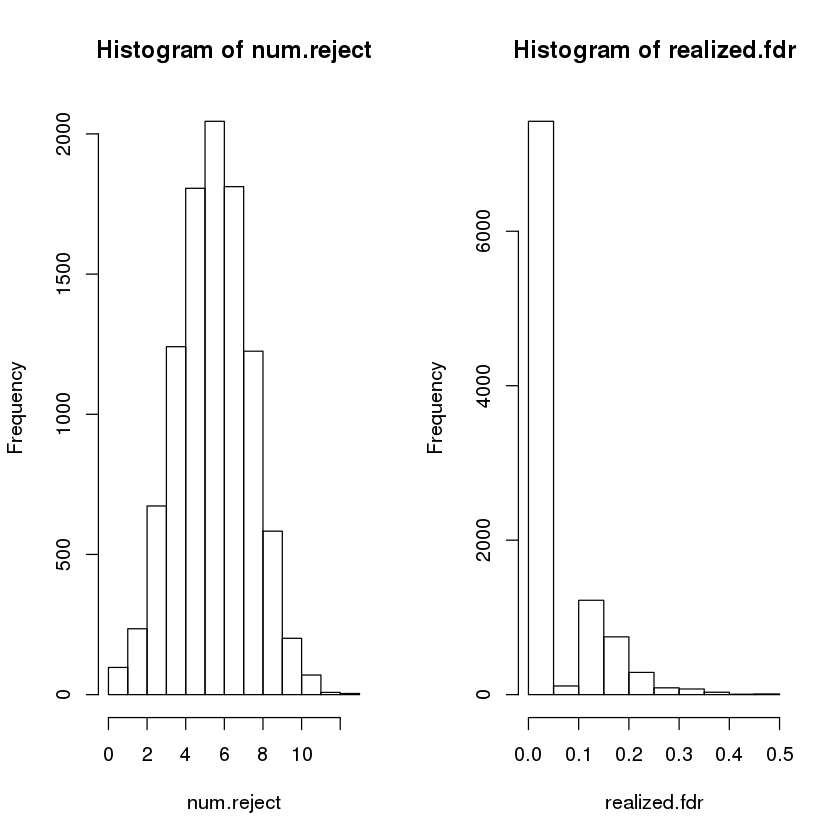

In [6]:
set.seed(1234)
num.sims <- 10000       # number of simulation
N <- 100                # number of tests
alpha <- 0.05           # Chosen False Discovery Rate
pi0 <-0.9               # fraction of hypotheses that are null
N0 <-round(pi0*N)       # number of true null
N1 <- N-N0              # number of false null or alternative
alt.strength <- 10      # control the degree of alternativeness
alt.shape1 <- 1/alt.strength
null <- c(1:N0)
alt <- c((N0+1):N)
alt.indicator <-c(rep(0,N0),rep(1,N1))
realized.fdr <- rep(1, num.sims)
num.reject <- rep(0,num.sims)

for (i in(1:num.sims)) {
       p=rep(1,N)
       p[null] <- runif(N0, 0,1)                # under null, p-values are uniformly distributed between 0 and 1
       p[alt] <- rbeta(N1, shape1=alt.shape1,1) # under alt, p-values are skewed towards to 0.
       #par(mfrow=c(2,2))
       #hist(p)
       #hist(p[null])
       #hist(p[alt])
       p.order <- order(p)
       bh.argument <- (sort(p)<=alpha*c(1:N)/N) # indicate significant p-values under BH criteria for each test
       
       if(sum(bh.argument)==0){
           khat=0
           reject.set=NULL
           realized.fdr[i]=0
           num.reject[i]=0
       }       # if none of p-values are significant, FDR is 0 by definition
       if (sum(bh.argument)>0){
           khat=which.max(bh.argument*c(1:N)) # get th index of the last "TRUE" in bh.argument
           reject.set=c(1:khat)
           N01=sum((1-alt.indicator[p.order])[1:khat])
           realized.fdr[i]=N01/khat
           num.reject[i]=khat
       }       # if some tests are rejected, FDR is calculated
      }
par(mfrow=c(1,2))
hist(num.reject)
hist(realized.fdr)


mean(realized.fdr) # an estimate of the true FDR


changing the strength of alternative, FDR is always controled to be smaller or equal to 4.5%.